Capstone Project - Battle of Neighbourhoods (Part 2)

Introduction to the Problem
Initial Statement. Analysis of Restaurants in Paris on the basis of its Type and Distance using Foursquare API

Paris is certainly one of the best cities for food-culture in the entire Europe. There are abundant choices for various types of gourmet food in the city. There are also Michelin Star-chefs and Michelin star-restaurants. I have personally been to Paris on a number of occasions and have been amazed with the options available in the city. I always want to try out more. And I am sure, all tourists also would be hungry-for-more. One major problem that I have found is the distance of our places of residence in Paris to the locations of these fantastic restaurants. Therefore, I want to find ot the correct distances, preferably from a central location, so as to make it easy for everyone and also so that I may be able to use it during my next visit and also share it with the community.

I would be using the Foursquare API, which we have learned in the previous module.

In order to import the required libraries,I would run the following code:-

In [1]:
import numpy as np 
import pandas as pd 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import json 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
!pip install folium
import folium
!conda install -c conda-forge geopy --yes
print('All the necessary Libraries are imported.')

     |████████████████████████████████| 92kB 7.3MB/s eta 0:00:011
Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-1.21.0               |             py_0          58 KB  conda-forge
    certifi-2019.11.28         |           py36_0         149 KB  conda-forge
    ca-certificates-2019.11.28 |       hecc5488_0         145 KB  conda-forge
    openssl-1.1.1d             |       h516909a_0         2.1 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.50-py_0         conda-forge
    geopy:           1.21.0-py_0  

Now, in order to obtain the accurate coordinates of Pairs, I would run the following code:-

In [2]:
address = 'Paris, Paris'
geolocator = Nominatim(user_agent="paris_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of Paris are {}, {}.'.format(latitude, longitude))

The geograpical coordinates of Paris are 48.8566969, 2.3514616.


For setting up my Foursquare API with my personlised ID, I would run the following code:-

In [3]:
CLIENT_ID = '5QSFCGKQQQN3R5SSWMO1ZOQ3IBDB0R52RQLDEHZCSYTWZGBJ' # your Foursquare ID
CLIENT_SECRET = '0JCF4PLZVQGBN0YL1BEXK0RSNTL0D03VXJ1C3V4GWUNX1MDZ' # your Foursquare Secret
VERSION = '202001218' # Foursquare API version
LIMIT = 100
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 5QSFCGKQQQN3R5SSWMO1ZOQ3IBDB0R52RQLDEHZCSYTWZGBJ
CLIENT_SECRET:0JCF4PLZVQGBN0YL1BEXK0RSNTL0D03VXJ1C3V4GWUNX1MDZ


Now I need to specify the restaurant-query. For that:-

In [4]:
search_query = 'Restaurant'
radius = 50000
print(search_query + ' .... Done!')

Restaurant .... Done!


In [5]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=5QSFCGKQQQN3R5SSWMO1ZOQ3IBDB0R52RQLDEHZCSYTWZGBJ&client_secret=0JCF4PLZVQGBN0YL1BEXK0RSNTL0D03VXJ1C3V4GWUNX1MDZ&ll=48.8566969,2.3514616&v=202001218&query=Restaurant&radius=50000&limit=100'

In [6]:
results = requests.get(url).json()
venues = results['response']['venues']
dataframe = json_normalize(venues)
dataframe.head()

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.neighborhood,location.postalCode,location.state,name,referralId,venuePage.id
0,"[{'id': '4bf58dd8d48988d10c941735', 'name': 'F...",False,50445ef7e4b0ba0a539ad83f,23 rue d'Arcole,FR,Paris,France,NaN,373,"[23 rue d'Arcole, 75004 Paris, France]","[{'label': 'display', 'lat': 48.85362193008465...",48.853622,2.349421,NaN,75004,Île-de-France,Restaurant Aux Tours de Notre-Dame,v-1583356324,NaN
1,"[{'id': '4bf58dd8d48988d10c941735', 'name': 'F...",False,4e2b2d0ad22d3f83c88c7029,12 passage Molière,FR,Paris,France,NaN,626,"[12 passage Molière, 75003 Paris, France]","[{'label': 'display', 'lat': 48.86232131013030...",48.862321,2.351590,NaN,75003,Île-de-France,Le Restaurant des Poètes,v-1583356324,NaN
2,"[{'id': '4bf58dd8d48988d10c941735', 'name': 'F...",False,4cbb05054352a1cd0d4396f5,1 rue de la Légion d'Honneur,FR,Paris,France,NaN,1950,"[1 rue de la Légion d'Honneur, 75007 Paris, Fr...","[{'label': 'display', 'lat': 48.86029986248957...",48.860300,2.325392,NaN,75007,Île-de-France,Le Restaurant du Musée d'Orsay,v-1583356324,NaN
3,"[{'id': '4bf58dd8d48988d10c941735', 'name': 'F...",False,52cf091111d2d9bb920d6122,Hôtel Costes,FR,Paris,France,239 rue Saint-Honoré,2053,"[Hôtel Costes (239 rue Saint-Honoré), Paris, F...","[{'label': 'display', 'lat': 48.86669789450374...",48.866698,2.327894,NaN,NaN,Île-de-France,Restaurant Costes Saint-Honoré,v-1583356324,NaN
4,"[{'id': '4bf58dd8d48988d10c941735', 'name': 'F...",False,4d4960ae9544a09370bb27e7,91 rue La Boétie,FR,Paris,France,NaN,1343,"[91 rue La Boétie, 75008 Paris, France]","[{'label': 'display', 'lat': 48.85568519411101...",48.855685,2.333184,NaN,75008,Île-de-France,Restaurant Au 35,v-1583356324,NaN


In [7]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_paris = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_paris['categories'] = dataframe_paris.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_paris.columns = [column.split('.')[-1] for column in dataframe_paris.columns]

dataframe_paris.head(10)

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,neighborhood,postalCode,state,id
0,Restaurant Aux Tours de Notre-Dame,French Restaurant,23 rue d'Arcole,FR,Paris,France,NaN,373,"[23 rue d'Arcole, 75004 Paris, France]","[{'label': 'display', 'lat': 48.85362193008465...",48.853622,2.349421,NaN,75004,Île-de-France,50445ef7e4b0ba0a539ad83f
1,Le Restaurant des Poètes,French Restaurant,12 passage Molière,FR,Paris,France,NaN,626,"[12 passage Molière, 75003 Paris, France]","[{'label': 'display', 'lat': 48.86232131013030...",48.862321,2.351590,NaN,75003,Île-de-France,4e2b2d0ad22d3f83c88c7029
2,Le Restaurant du Musée d'Orsay,French Restaurant,1 rue de la Légion d'Honneur,FR,Paris,France,NaN,1950,"[1 rue de la Légion d'Honneur, 75007 Paris, Fr...","[{'label': 'display', 'lat': 48.86029986248957...",48.860300,2.325392,NaN,75007,Île-de-France,4cbb05054352a1cd0d4396f5
3,Restaurant Costes Saint-Honoré,French Restaurant,Hôtel Costes,FR,Paris,France,239 rue Saint-Honoré,2053,"[Hôtel Costes (239 rue Saint-Honoré), Paris, F...","[{'label': 'display', 'lat': 48.86669789450374...",48.866698,2.327894,NaN,NaN,Île-de-France,52cf091111d2d9bb920d6122
4,Restaurant Au 35,French Restaurant,91 rue La Boétie,FR,Paris,France,NaN,1343,"[91 rue La Boétie, 75008 Paris, France]","[{'label': 'display', 'lat': 48.85568519411101...",48.855685,2.333184,NaN,75008,Île-de-France,4d4960ae9544a09370bb27e7
5,Restaurant Le Mona Lisa,French Restaurant,47 rue Berger,FR,Paris,France,NaN,895,"[47 rue Berger, 75001 Paris, France]","[{'label': 'display', 'lat': 48.86219809159731...",48.862198,2.342542,NaN,75001,Île-de-France,59ab059c86bc49021b313ca9
6,Restaurant de l'Institut du Monde Arabe.,Middle Eastern Restaurant,1 rue des Fossés Saint-Bernard,FR,Paris,France,Institut du Monde Arabe,963,[1 rue des Fossés Saint-Bernard (Institut du M...,"[{'label': 'display', 'lat': 48.84881796195433...",48.848818,2.356911,NaN,75005,Île-de-France,4bd1e55c9854d13a2c79fa4d
7,Restaurant 58 Tour Eiffel,French Restaurant,5 avenue Anatole France,FR,Paris,France,"Tour Eiffel, 1er étage",4194,"[5 avenue Anatole France (Tour Eiffel, 1er éta...","[{'label': 'display', 'lat': 48.85836582402155...",48.858366,2.294249,NaN,75007,Île-de-France,4e078807e4cdefcff6dce4f6
8,Restaurant Le Meurice Alain Ducasse,French Restaurant,228 rue de Rivoli,FR,Paris,France,Hôtel Le Meurice,1963,"[228 rue de Rivoli (Hôtel Le Meurice), 75001 P...","[{'label': 'display', 'lat': 48.86529145109384...",48.865291,2.328056,NaN,75001,Île-de-France,4adcda13f964a520e53621e3
9,Le Restaurant de L'Hôtel,French Restaurant,13 rue des Beaux-Arts,FR,Paris,France,L'Hôtel,1197,"[13 rue des Beaux-Arts (L'Hôtel), 75006 Paris,...","[{'label': 'display', 'lat': 48.85619157441753...",48.856192,2.335133,NaN,75006,Île-de-France,4bbcc19b8ec3d13aa42e1b28


Data has now been collected and I am ready to proceed.

Let's see Paris

In [8]:
import matplotlib. pyplot as plt
!pip install folium
import folium
venues_map = folium.Map(location=[latitude, longitude], zoom_start=13)
venues_map

In this maze, where arenour restaurants. Lets highlight them in Red colour.

In [9]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=13) # generates a map centred around the City of Paris
for lat, lng, label in zip(dataframe_paris.lat, dataframe_paris.lng, dataframe_paris.categories):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='red',
        popup=label,
        fill = True,
        fill_color='red',
        fill_opacity=0.6
    ).add_to(venues_map)
# display map
venues_map

Now we can clearly visualise our restaurants.

In [10]:
print (dataframe_paris['categories'].value_counts())

French Restaurant            21
Restaurant                    3
College Cafeteria             3
Middle Eastern Restaurant     2
Japanese Restaurant           2
Turkish Restaurant            2
Szechuan Restaurant           2
Vietnamese Restaurant         2
City Hall                     1
Kebab Restaurant              1
Italian Restaurant            1
Corporate Cafeteria           1
Cafeteria                     1
Thai Restaurant               1
Sandwich Place                1
Persian Restaurant            1
Hotel Bar                     1
Bistro                        1
Chinese Restaurant            1
Fast Food Restaurant          1
Korean Restaurant             1
Name: categories, dtype: int64


Paris does have a very huge number of restaurants to cater to all of us

Let's get our Pandas

In [11]:
Paris_Top = dataframe_paris['categories'].value_counts()[0:10].to_frame(name='frequency')
Paris_Top=Paris_Top.reset_index()


Paris_Top.rename(index=str, columns={"index": "categories", "frequency": "Frequency"}, inplace=True)
Paris_Top

,categories,Frequency
0,French Restaurant,21
1,Restaurant,3
2,College Cafeteria,3
3,Middle Eastern Restaurant,2
4,Japanese Restaurant,2
5,Turkish Restaurant,2
6,Szechuan Restaurant,2
7,Vietnamese Restaurant,2
8,City Hall,1
9,Kebab Restaurant,1


Let's Visualize this Information in the form of a Bar Chart by using the Seaborn Data Visualization Library

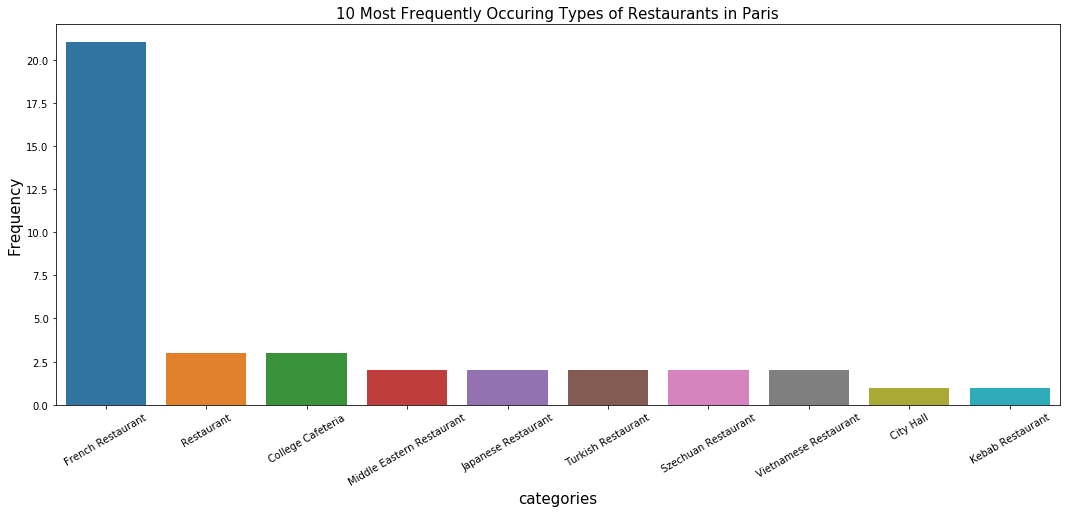

In [12]:
import seaborn as sns
fig = plt.figure(figsize=(18,7))
s=sns.barplot(x="categories", y="Frequency", data=Paris_Top)
s.set_xticklabels(s.get_xticklabels(), rotation=30)
plt.title('10 Most Frequently Occuring Types of Restaurants in Paris', fontsize=15)
plt.xlabel("categories", fontsize=15)
plt.ylabel ("Frequency", fontsize=15)
plt.show()

Let us make this information a bit user friendly

In [13]:
FR=dataframe_paris['name']
FR=FR.reset_index()
FR.head(30)

,index,name
0,0,Restaurant Aux Tours de Notre-Dame
1,1,Le Restaurant des Poètes
2,2,Le Restaurant du Musée d'Orsay
3,3,Restaurant Costes Saint-Honoré
4,4,Restaurant Au 35
5,5,Restaurant Le Mona Lisa
6,6,Restaurant de l'Institut du Monde Arabe.
7,7,Restaurant 58 Tour Eiffel
8,8,Restaurant Le Meurice Alain Ducasse
9,9,Le Restaurant de L'Hôtel


In [14]:
FR2=dataframe_paris['categories']
FR2=FR2.reset_index()
FR2.head(30)

,index,categories
0,0,French Restaurant
1,1,French Restaurant
2,2,French Restaurant
3,3,French Restaurant
4,4,French Restaurant
5,5,French Restaurant
6,6,Middle Eastern Restaurant
7,7,French Restaurant
8,8,French Restaurant
9,9,French Restaurant


In [15]:
FR3= (pd.merge(FR, FR2, on="index" ))
FR3.head(40)

,index,name,categories
0,0,Restaurant Aux Tours de Notre-Dame,French Restaurant
1,1,Le Restaurant des Poètes,French Restaurant
2,2,Le Restaurant du Musée d'Orsay,French Restaurant
3,3,Restaurant Costes Saint-Honoré,French Restaurant
4,4,Restaurant Au 35,French Restaurant
5,5,Restaurant Le Mona Lisa,French Restaurant
6,6,Restaurant de l'Institut du Monde Arabe.,Middle Eastern Restaurant
7,7,Restaurant 58 Tour Eiffel,French Restaurant
8,8,Restaurant Le Meurice Alain Ducasse,French Restaurant
9,9,Le Restaurant de L'Hôtel,French Restaurant


We should now have all our required data.

In [16]:
FR3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 49
Data columns (total 3 columns):
index         50 non-null int64
name          50 non-null object
categories    50 non-null object
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [17]:
FR4=dataframe_paris['distance']
FR4=FR4.reset_index()
FR4.head(40)

,index,distance
0,0,373
1,1,626
2,2,1950
3,3,2053
4,4,1343
5,5,895
6,6,963
7,7,4194
8,8,1963
9,9,1197


In [18]:
FR4.drop(columns='index')

,distance
0,373
1,626
2,1950
3,2053
4,1343
5,895
6,963
7,4194
8,1963
9,1197


Let us now make these two tables useful at one glance

In [19]:
FR5= (pd.merge(FR3, FR4, on='index'))
FR5.head(40)

,index,name,categories,distance
0,0,Restaurant Aux Tours de Notre-Dame,French Restaurant,373
1,1,Le Restaurant des Poètes,French Restaurant,626
2,2,Le Restaurant du Musée d'Orsay,French Restaurant,1950
3,3,Restaurant Costes Saint-Honoré,French Restaurant,2053
4,4,Restaurant Au 35,French Restaurant,1343
5,5,Restaurant Le Mona Lisa,French Restaurant,895
6,6,Restaurant de l'Institut du Monde Arabe.,Middle Eastern Restaurant,963
7,7,Restaurant 58 Tour Eiffel,French Restaurant,4194
8,8,Restaurant Le Meurice Alain Ducasse,French Restaurant,1963
9,9,Le Restaurant de L'Hôtel,French Restaurant,1197


In [20]:
FR6 = FR5.sort_values(by ='distance' )
FR6.head(20)

,index,name,categories,distance
37,37,Hôtel de Ville de Paris (Hôtel de ville de Paris),City Hall,71
19,19,Restaurant Viet,Vietnamese Restaurant,131
30,30,Restaurant Shiso,Japanese Restaurant,330
0,0,Restaurant Aux Tours de Notre-Dame,French Restaurant,373
35,35,Restaurant Istamboul,Sandwich Place,396
26,26,Restaurant Jardin Notre-Dame,French Restaurant,573
46,46,Restaurant Les Degrés de Notre Dame,French Restaurant,603
1,1,Le Restaurant des Poètes,French Restaurant,626
43,43,Restaurant AG Les Halles,French Restaurant,713
40,40,Restaurant Mae Nam Choapraya,Thai Restaurant,775


Let's sample check our results now

In [21]:
FR6.head(10)

,index,name,categories,distance
37,37,Hôtel de Ville de Paris (Hôtel de ville de Paris),City Hall,71
19,19,Restaurant Viet,Vietnamese Restaurant,131
30,30,Restaurant Shiso,Japanese Restaurant,330
0,0,Restaurant Aux Tours de Notre-Dame,French Restaurant,373
35,35,Restaurant Istamboul,Sandwich Place,396
26,26,Restaurant Jardin Notre-Dame,French Restaurant,573
46,46,Restaurant Les Degrés de Notre Dame,French Restaurant,603
1,1,Le Restaurant des Poètes,French Restaurant,626
43,43,Restaurant AG Les Halles,French Restaurant,713
40,40,Restaurant Mae Nam Choapraya,Thai Restaurant,775


We should also see them graphically for a better overview

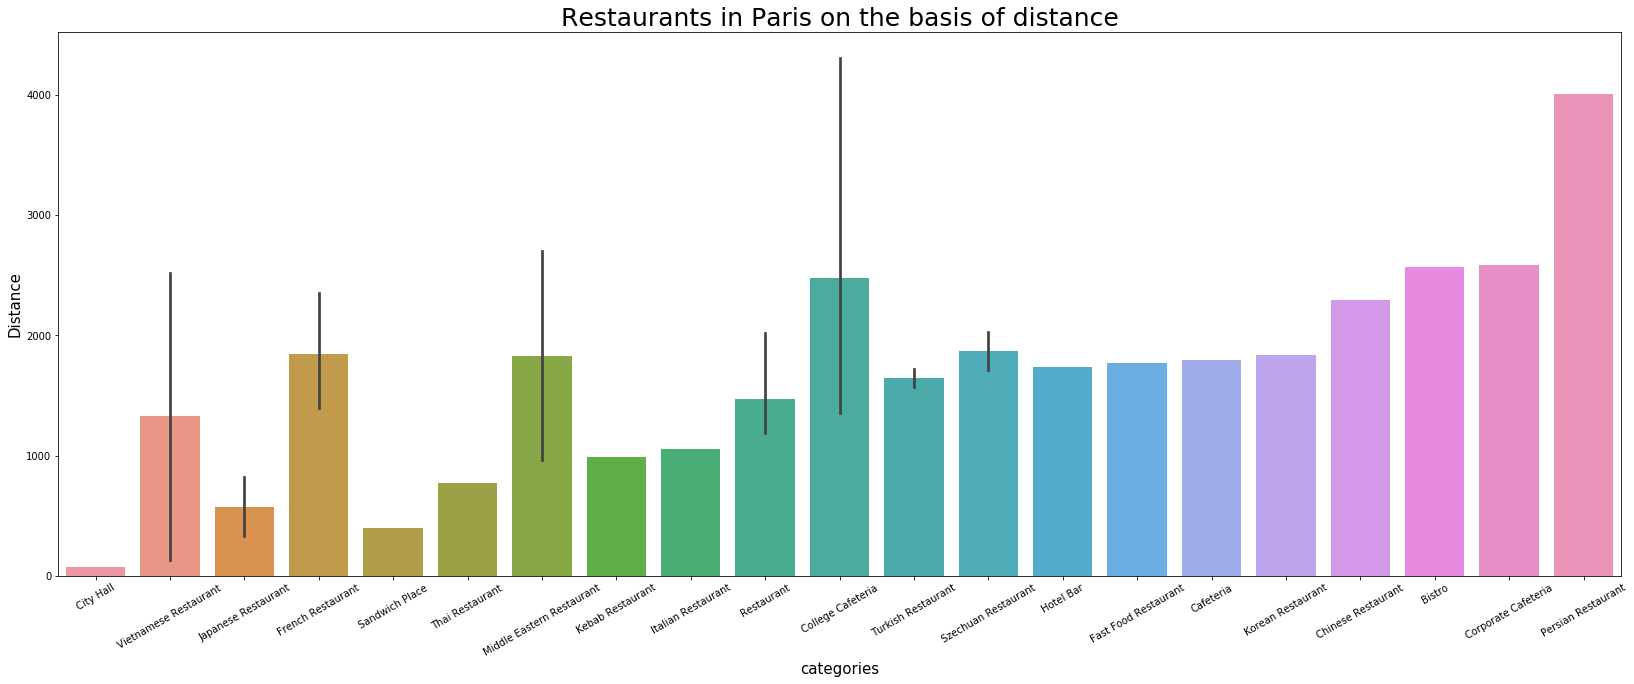

In [22]:
fig = plt.figure(figsize=(28,10))
s=sns.barplot(x="categories", y="distance",  data=FR6)
s.set_xticklabels(s.get_xticklabels(), rotation=30)
plt.title('Restaurants in Paris on the basis of distance', fontsize=25)
plt.xlabel("categories", fontsize=15)
plt.ylabel ("Distance", fontsize=15)
plt.show()

In [23]:
FR7= FR6.copy()
FR7[:10]

,index,name,categories,distance
37,37,Hôtel de Ville de Paris (Hôtel de ville de Paris),City Hall,71
19,19,Restaurant Viet,Vietnamese Restaurant,131
30,30,Restaurant Shiso,Japanese Restaurant,330
0,0,Restaurant Aux Tours de Notre-Dame,French Restaurant,373
35,35,Restaurant Istamboul,Sandwich Place,396
26,26,Restaurant Jardin Notre-Dame,French Restaurant,573
46,46,Restaurant Les Degrés de Notre Dame,French Restaurant,603
1,1,Le Restaurant des Poètes,French Restaurant,626
43,43,Restaurant AG Les Halles,French Restaurant,713
40,40,Restaurant Mae Nam Choapraya,Thai Restaurant,775


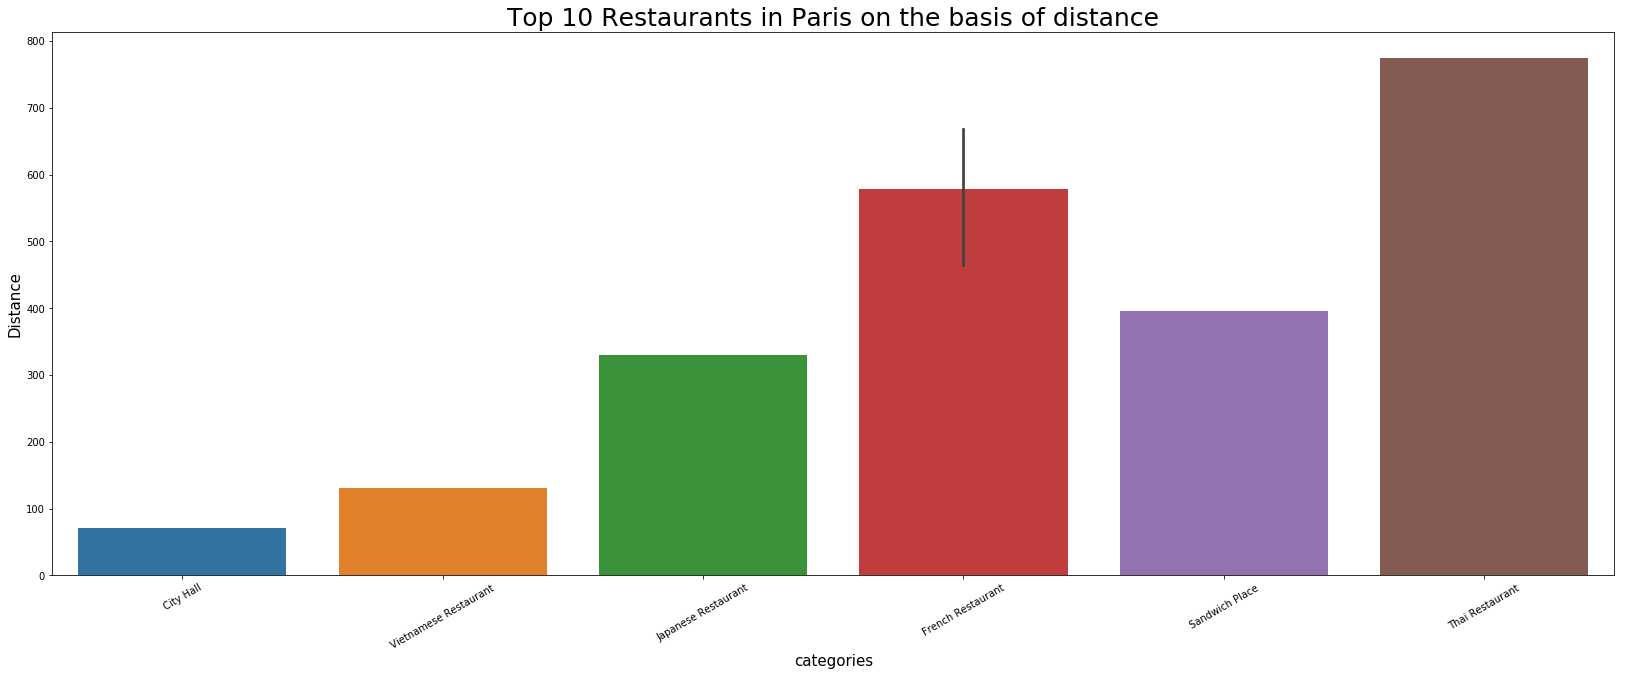

In [24]:
fig = plt.figure(figsize=(28,10))
s=sns.barplot(x="categories", y="distance",  data=FR7[:10])
s.set_xticklabels(s.get_xticklabels(), rotation=30)
plt.title('Top 10 Restaurants in Paris on the basis of distance', fontsize=25)
plt.xlabel("categories", fontsize=15)
plt.ylabel ("Distance", fontsize=15)
plt.show()

Comparing the two bar-graphs, this looks more user friendly. It can be ascertained that Vietnamese, Japanese, French and Sandwich Place are the most suitable

Whenever I visit any new country, where to stay and where to eat are always issues in front of tourists. ere, I have focussed on the where to eat part of the issue. I am certain that every tourist would like to have such information at hand so as to use his time and, more importantly, his money in an optimal manner.